In [47]:
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn
import torchvision
from torch import optim
import torchvision.transforms as transforms

In [48]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print(image.size())
print(label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [49]:
train_dataset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [50]:
image.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

In [51]:
import matplotlib.pyplot as plt

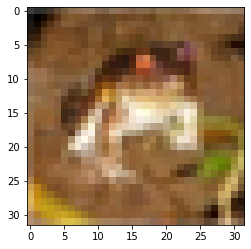

In [52]:
plt.imshow(image.permute(1, 2, 0).numpy());

In [53]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128, 
                                           shuffle=True)

In [54]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16,
                                          shuffle=False)

Files already downloaded and verified


In [55]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [86]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim)
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.tanh(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=10, bias=True)
)

In [87]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)

In [88]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/5]. Step [1/391]. Loss: 0.018
Epoch [1/5]. Step [301/391]. Loss: 0.018
Epoch [2/5]. Step [1/391]. Loss: 0.018
Epoch [2/5]. Step [301/391]. Loss: 0.018
Epoch [3/5]. Step [1/391]. Loss: 0.018
Epoch [3/5]. Step [301/391]. Loss: 0.018
Epoch [4/5]. Step [1/391]. Loss: 0.017
Epoch [4/5]. Step [301/391]. Loss: 0.017
Epoch [5/5]. Step [1/391]. Loss: 0.016
Epoch [5/5]. Step [301/391]. Loss: 0.016
Training is finished!


In [89]:
PATH_MODEL = './cifar_net_test_version_model.pth'
torch.save(net, PATH_MODEL)

In [90]:
net = torch.load(PATH_MODEL)

In [91]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:  cat ship ship plane frog frog car frog cat car plane truck dog horse truck ship


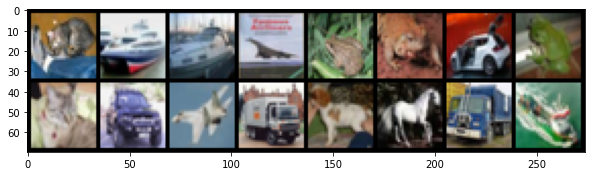

In [92]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [93]:
net.predict(images)

C:\Users\VOL-WKST1084\AppData\Local\Temp\ipykernel_18324\3443739885.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([[0.1106, 0.1007, 0.1111, 0.1158, 0.0944, 0.1051, 0.0872, 0.1117, 0.0793,
         0.0842],
        [0.1575, 0.1342, 0.0075, 0.0064, 0.0034, 0.0042, 0.0019, 0.0088, 0.3554,
         0.3207],
        [0.1649, 0.1428, 0.0120, 0.0106, 0.0061, 0.0073, 0.0037, 0.0141, 0.3375,
         0.3010],
        [0.1905, 0.1532, 0.0233, 0.0198, 0.0111, 0.0138, 0.0072, 0.0245, 0.2928,
         0.2636],
        [0.0470, 0.0428, 0.1257, 0.1499, 0.1478, 0.1569, 0.1500, 0.1327, 0.0218,
         0.0253],
        [0.0337, 0.0366, 0.1232, 0.1477, 0.1554, 0.1571, 0.1711, 0.1391, 0.0149,
         0.0211],
        [0.0358, 0.0385, 0.1180, 0.1432, 0.1567, 0.1626, 0.1746, 0.1291, 0.0186,
         0.0228],
        [0.0299, 0.0305, 0.1209, 0.1423, 0.1716, 0.1650, 0.1763, 0.1335, 0.0131,
         0.0169],
        [0.0701, 0.0573, 0.1311, 0.1484, 0.1294, 0.1428, 0.1152, 0.1390, 0.0306,
         0.0360],
        [0.1650, 0.1428, 0.0114, 0.0099, 0.0054, 0.0065, 0.0033, 0.0130, 0.3333,
         0.3094],
        [0

In [94]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 8, 8, 8, 5, 6, 6, 6, 3, 8, 8, 9, 5, 8, 9, 0])

In [95]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog' 'cat' 'car'
 'plane' 'truck' 'dog' 'horse' 'truck' 'ship']
['cat' 'ship' 'ship' 'ship' 'dog' 'frog' 'frog' 'frog' 'cat' 'ship' 'ship'
 'truck' 'dog' 'ship' 'truck' 'plane']
Accuracy is 0.5625
